# Рубежный контроль 1

### Ким Алексей ИУ5-62Б 

### Вариант - 8

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks')
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, Normalizer
import plotly.express as px

In [2]:
df = pd.read_csv('HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Приведем описание наших значений:

CRIM - уровень преступности на душу населения по городам

ZN  - доля земель под жилую застройку, зонированных под участки свыше 25 000 кв.м.

INDUS  - доля акров неторгового бизнеса на город.

CHAS - фиктивная переменная реки Чарльз (1, если участок граничит с рекой; 0 в противном случае)

NOX - концентрация оксидов азота (частей на 10 млн)

RM - среднее количество комнат в жилом помещении

AGE  - доля жилых единиц, построенных до 1940 г.

DIS - взвешенные расстояния до пяти центров занятости Бостона.

RAD - индекс доступности к радиальным магистралям

TAX  - полная ставка налога на имущество за 10 000 долларов США.

PTTRATIO - соотношение учеников и учителей по городам

B - 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам.

LSTAT - % более низкий статус населения

MEDV - Средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

In [5]:
def missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
    missing_data_table = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
    return missing_data_table
missing(df)

,Total,Percent
CRIM,20,0.039526
ZN,20,0.039526
INDUS,20,0.039526
CHAS,20,0.039526
AGE,20,0.039526
LSTAT,20,0.039526
NOX,0,0.000000
RM,0,0.000000
DIS,0,0.000000
RAD,0,0.000000


Так как количество пропусков очень мало, то можно их просто удалить

In [6]:
df = df.dropna(axis=0)

In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Теперь, приступаем к подготовке к анализу.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


В датасете изначально все числовые признаки, так что сделаем корреляционный анализ

<Axes: >

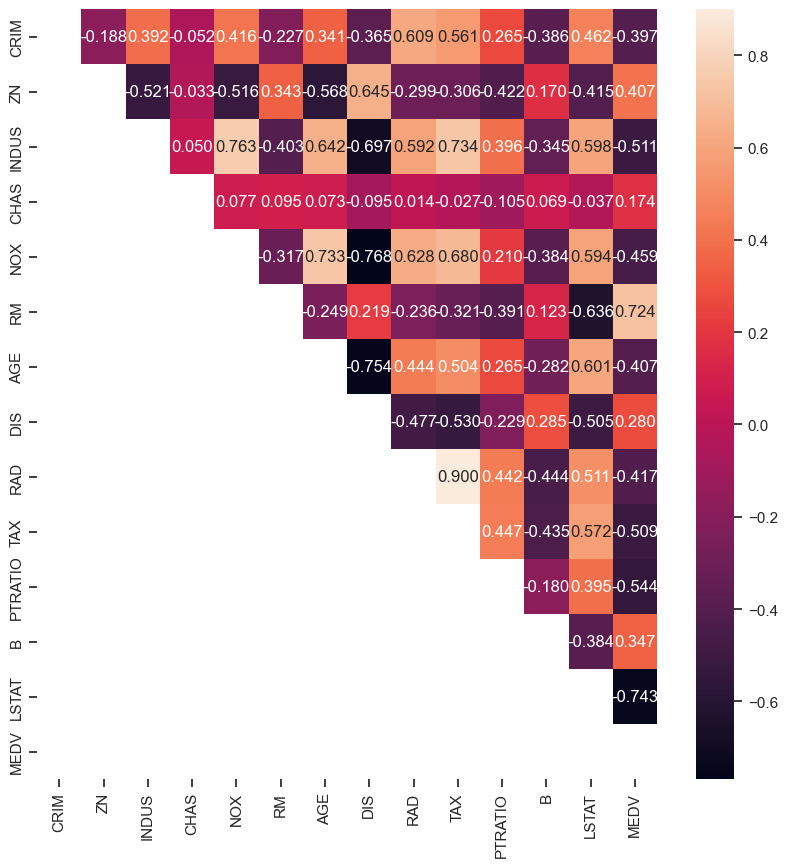

In [9]:
mask = np.zeros_like(df.corr(numeric_only=True), dtype=bool)
mask[np.tril_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), mask=mask, annot=True, fmt='.3f', ax=ax)

Как видно по тепловой карте, уровень приступности на душу населения по городам зависит от доступности к магистралям и с полной ставкой налога на имущество. Также среднезависим от концентрации оксидов азота, от возраста зданий и долю акров неторгового бизнеса на город. Обратно зависим от среднего количества комнат в жилом помещении, от доли чернокожих по городам и средней стоимости домов.

Самые большие обратные зависимости - доля актов неторгового безнеса, концентрации оксидов азота возраст зданий от взвешенных расстояний до пяти центров Бостона; Низкий статус населения от средней стоимости домов. Прямая высока зависимость - среднее количество комнат в жилом помещении от средней стоимости домов, концентрация оксидов азота от возраста домов, доля акров неторгового бизнеса на город от концентрации оксидов азота, возраст домов от более низкого статуса населения, налоги от статуса населения. 

Соотвественно логично, что и показано на карте, что идет прямая зависимость индекса доступности к магистралям, доля акров неторгового бизнеса на город от полной ставки налога на имущество.

Также по карте видно, что количество чернокожих, зависит от налогов и практически связано с приступностью.

По тепловой карте понятно, что близость с рекой Чарльз практически ни на что не влияет.

Также, что очевидно, налоги зависят от соотношений учеников и учителей по городам, а также с более низским статусом населения.

Посмотрев на карту, можно убедиться, что статус население зависит от среднего количества комнат в жилом помещении, возраста домов, уровень преступности и земели под застройку


<Axes: xlabel='AGE', ylabel='Density'>

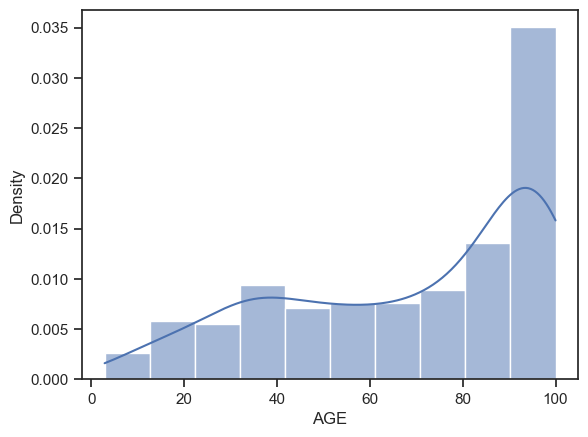

In [10]:
sns.histplot(df['AGE'], kde=True, stat='density')